# Task # 3 - Prediction Using Decision Tree Algorithm
## Problem Statement:
Create the Decision Tree classifier and represent it visually From the given ‘Iris’ dataset.
## Purpose :
If we feed any new data to this classifier , it would be able to predict the right class accordingly.

##Author: Kranti Sambhaji Walke

## Import the necessary libraries

In [29]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from itertools import product
from mlxtend.plotting import plot_decision_regions

## Read the data as a data frame and do Basic EDA

In [30]:
from sklearn.datasets import load_iris

data = load_iris()
iris_df = pd.DataFrame(data.data, columns = data.feature_names)
target = pd.Categorical.from_codes(data.target, data.target_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [31]:
target = pd.get_dummies(target)
target

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


## 5 point summary of numerical attributes

In [32]:
iris_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


## Data type of each attribute

In [33]:
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

### Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 

In [34]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Checking the presence of missing values

In [35]:
val=iris_df.isnull().values.any()

if val==True:
    print("Missing values present : ", iris_df.isnull().values.sum())
    my_data=iris_df.dropna()
else:
    print("No missing values present")

No missing values present


## Finding unique data

In [36]:
iris_df.apply(lambda x: len(x.unique()))

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
dtype: int64

## Pairplot using sns

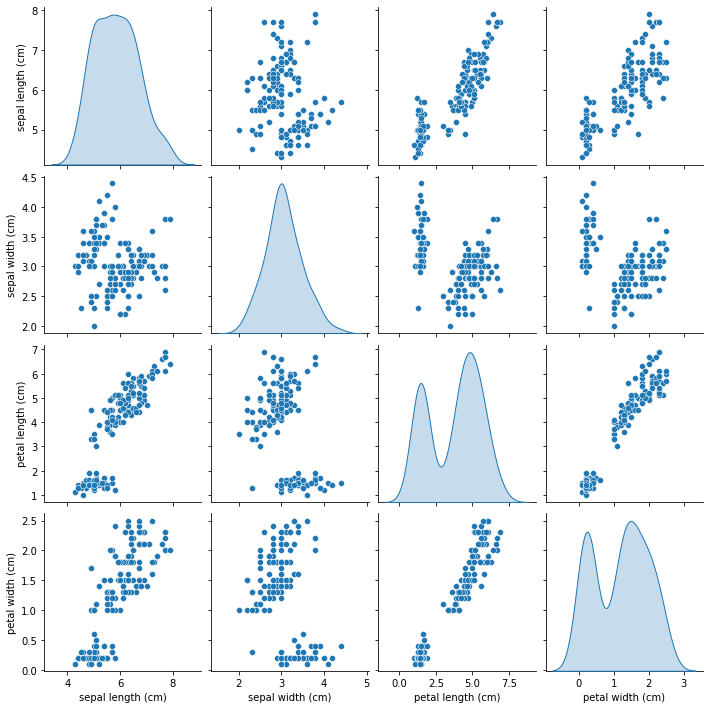

In [37]:
import seaborn as sns
sns.pairplot(iris_df , diag_kind = 'kde')

## Measure of skewness

In [38]:
iris_df.skew(axis = 0, skipna = True) 

sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
dtype: float64

## Ploting histogram to check that if data columns are normal or almost normal or not

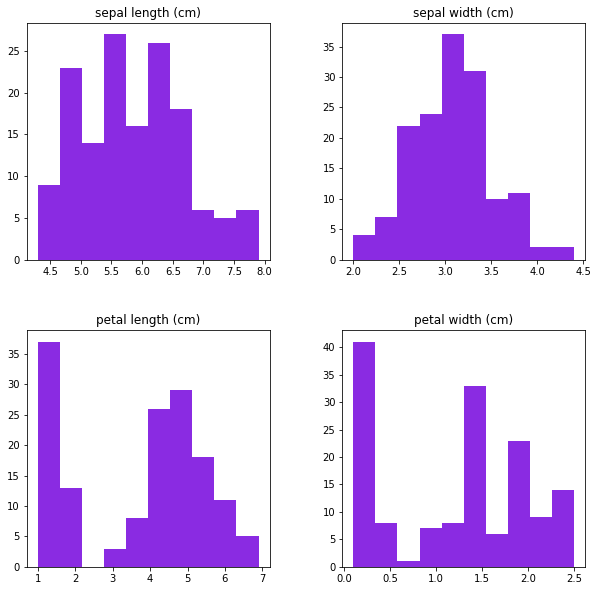

In [39]:
iris_df.hist(figsize=(10,10),color="blueviolet",grid=False)
plt.show()

<Figure size 720x576 with 0 Axes>

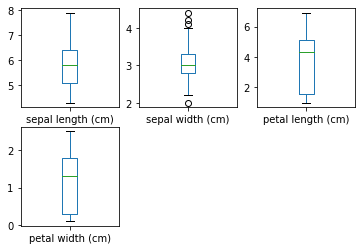

<Figure size 432x288 with 0 Axes>

In [51]:
plt.figure(figsize=[10,8])
iris_df.plot(kind="box",subplots=True,sharey=False,sharex=False,layout=(2,3))
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

## Calculate the correlation matrix

In [40]:


cor=iris_df.corr()
cor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


## Heatmap

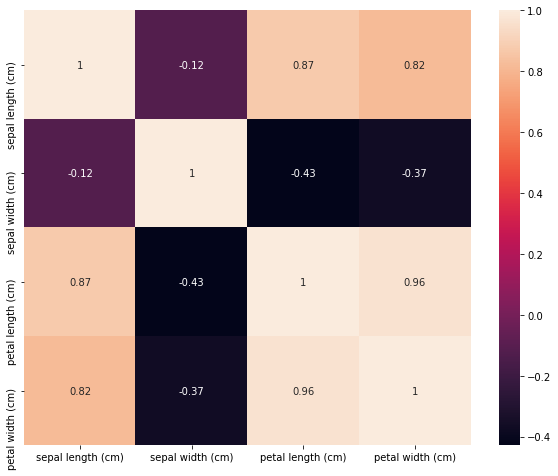

In [41]:
plt.subplots(figsize=(10,8))
sns.heatmap(cor,annot=True)

## Splitting Data into Training and Test Sets

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris_df[data.feature_names], target, random_state=0)

## Building Decision Tree Model

In [43]:
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier(max_depth = 3, random_state = 0)
Model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [44]:
pred = Model.predict(X_test)
pred

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

## Evaluating Model

In [45]:
# The score method returns the accuracy of the model
score = Model.score(X_test, Y_test)
print("score:",score)

score: 0.9736842105263158


In [46]:
score = Model.score(X_train, Y_train)
print("score:",score)

score: 0.9821428571428571


## Visualizing Decision Trees

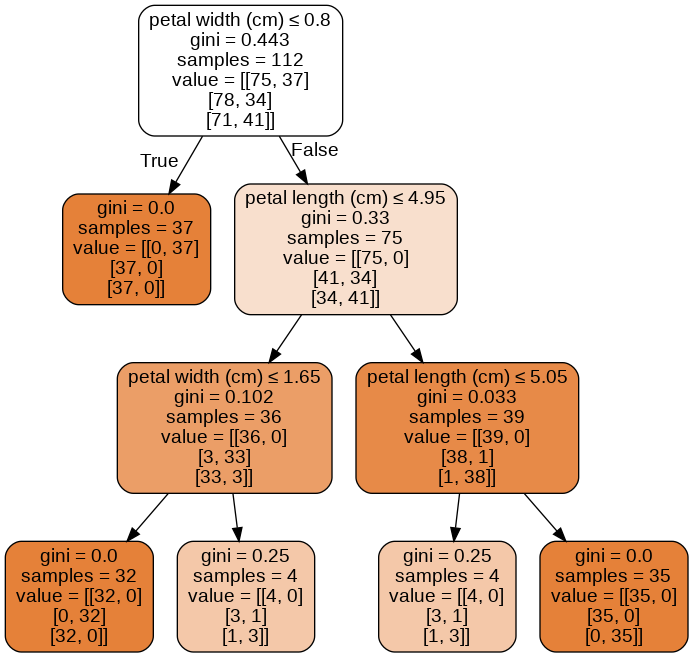

In [47]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from pydot import graph_from_dot_data
from IPython.display import Image 
import pydotplus

dot_data = StringIO()
export_graphviz(Model, out_file = dot_data, feature_names=data.feature_names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [48]:
pred_test = Model.predict(X_test)

In [49]:
pd.DataFrame([pred_test, Y_test]).T.head(50)

,0,1
0,"[[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 0, 1], [...",setosa versicolor virginica 114 0...


In [55]:
#accuracy 
accuracy = accuracy_score(pred_test, Y_test)
print("Accuracy is:",accuracy)

Accuracy is: 0.9736842105263158


In [54]:
#classification report
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
classificationreport = classification_report(pred_test, Y_test)
print(classificationreport)



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      1.00      0.97        15
           2       1.00      0.90      0.95        10

   micro avg       0.97      0.97      0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38
 samples avg       0.97      0.97      0.97        38

